# Initialize data

In [1]:
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pyfolio'

In [20]:
STOCKS={'600690':'QDHE','600036':'ZZYH'}
BENCHMARKS={'hs300':'HUSHEN300','sz50':'SHANGZHENG50'}

In [21]:
stock='600690'
benchmark='sz50'

In [22]:
## Load data to data frame

stock_rets=pd.read_csv('d:\\code\\'+stock+'.csv',sep='\t')
bm_rets=pd.read_csv('d:\\code\\'+benchmark+'.csv',sep='\t')

In [23]:
stock_rets.head()

,date,open,close,high,low,volume,code
0,2003-01-02,1.098,1.080,1.112,1.079,6191.92,600690
1,2003-01-03,1.077,1.079,1.086,1.074,6163.35,600690
2,2003-01-06,1.079,1.083,1.089,1.069,6682.01,600690
3,2003-01-07,1.086,1.085,1.098,1.079,4722.47,600690
4,2003-01-08,1.083,1.106,1.109,1.074,8117.70,600690


# Mangle

In [24]:
stock_rets['pct_ch']=stock_rets['close'].pct_change()
bm_rets['pct_ch']=bm_rets['close'].pct_change()

In [25]:
from dateutil.parser import parse

In [26]:
for i in range(stock_rets['date'].count()):
    stock_rets['date'][i]=parse(stock_rets['date'][i])

d:\code\py3env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
for i in range(bm_rets['date'].count()):
    bm_rets['date'][i]=parse(bm_rets['date'][i])

d:\code\py3env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
stock_rets.index=stock_rets['date']

In [29]:
stock_rets.head()

,date,open,close,high,low,volume,code,pct_ch
date,,,,,,,,
2003-01-02,2003-01-02 00:00:00,1.098,1.080,1.112,1.079,6191.92,600690,NaN
2003-01-03,2003-01-03 00:00:00,1.077,1.079,1.086,1.074,6163.35,600690,-0.000926
2003-01-06,2003-01-06 00:00:00,1.079,1.083,1.089,1.069,6682.01,600690,0.003707
2003-01-07,2003-01-07 00:00:00,1.086,1.085,1.098,1.079,4722.47,600690,0.001847
2003-01-08,2003-01-08 00:00:00,1.083,1.106,1.109,1.074,8117.70,600690,0.019355


In [31]:
rets=pd.DataFrame(stock_rets, columns=('date','pct_ch'))

rets=rets[rets.pct_ch.notnull()]

retss=pd.Series(rets['pct_ch'], index=rets['date'])

# pyfolio requires pd.Series for returns

print(retss.head())

date
2003-01-03   -0.000926
2003-01-06    0.003707
2003-01-07    0.001847
2003-01-08    0.019355
2003-01-09    0.018083
Name: pct_ch, dtype: float64


In [62]:
#rets.to_csv('D:\\code\\sz50rets.csv')

# Plot using pyfolio

In [132]:
%matplotlib inline

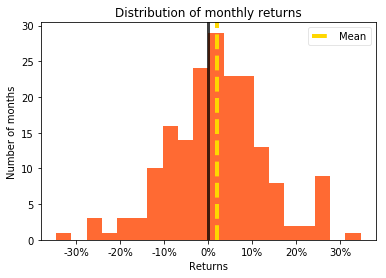

In [133]:
pf.plot_monthly_returns_dist(retss)

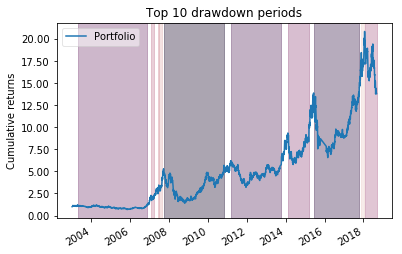

In [134]:
pf.plot_drawdown_periods(retss)

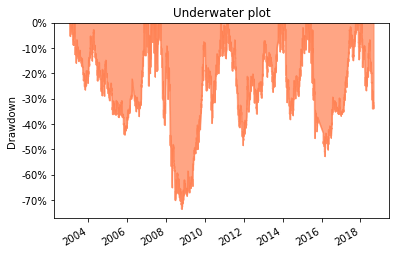

In [135]:
pf.plot_drawdown_underwater(retss)

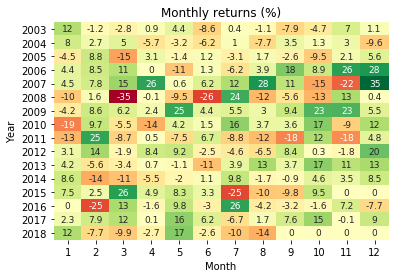

In [136]:
pf.plot_monthly_returns_heatmap(retss)

IndexError: index out of bounds

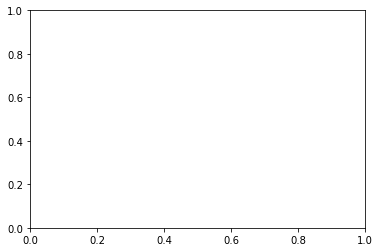

In [137]:
pf.plot_monthly_returns_timeseries(retss)

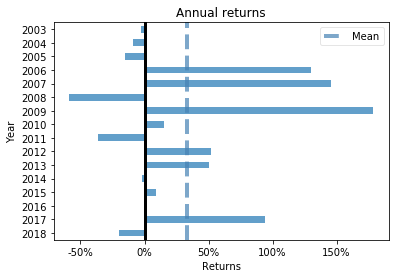

In [139]:
pf.plot_annual_returns(retss)

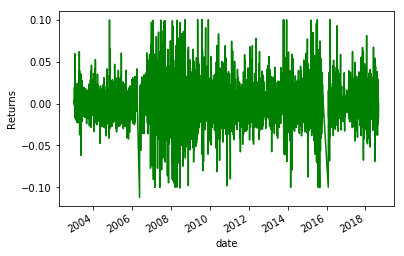

In [140]:
pf.plot_returns(retss)

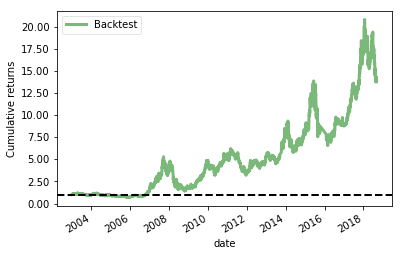

In [141]:
pf.plot_rolling_returns(retss)

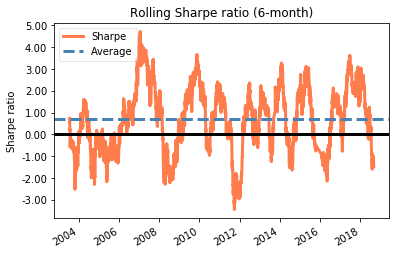

In [142]:
pf.plot_rolling_sharpe(retss)

AttributeError: 'NoneType' object has no attribute 'empty'

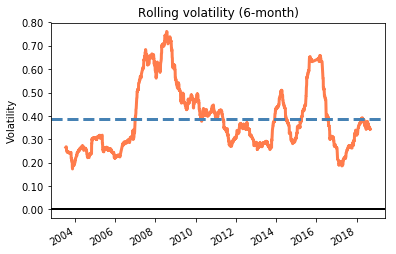

In [143]:
pf.plot_rolling_volatility(retss)